In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Função para calcular matriz de rotação entre frames
def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# # velocidade das rodas
# w = np.array([0,0,0])

# # Cinemática Direta
# Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])

# # Cinemática Inversa
# Minv = np.linalg.inv(Rz(q[2]) @ Mdir)

In [28]:
r = 0.023 # Raio de roda em metros
L = 0.114 # Raio do chassi em metros

def forward_kinematics(w):
    """
    Calcula as velocidades no referencial do robô a partir das velocidades das rodas.
    w: vetor [omega1, omega2, omega3] (rad/s)
    """
    J = np.array([
        [-r/np.sqrt(3),     0,         r/np.sqrt(3)],
        [r/3,             -2*r/3,        r/3],
        [r/(3*L),        r/(3*L),     r/(3*L)]
    ])
    return J @ w

def inverse_kinematics(v_robo):
    """
    Calcula [omega1, omega2, omega3] a partir de [x_dot, y_dot, theta_dot]_R
    """
    M = np.array([
        [-np.sqrt(3)/2,   1/2,  L],
        [0,             -1,    L],
        [np.sqrt(3)/2,   1/2,  L]
    ])
    return (1 / r) * (M @ v_robo)

def transformar_para_mundo(v_robo, theta):
    """
    Transforma as velocidades do referencial do robô para o referencial do mundo.
    v_robo: vetor [x_dot_r, y_dot_r, theta_dot_r]
    theta: ângulo de orientação do robô no mundo (rad)
    """
    R = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    return R @ v_robo

def velocidade_rodas(t):
    """
    Retorna a velocidade de cada roda para o tempo t
    t: float de instante de tempo
    """
    rpm_to_rads = (2*np.pi)/60
    w_rpm = np.array([50*rpm_to_rads,25*rpm_to_rads,25*rpm_to_rads])
    w = (w_rpm)
    return w

def simular_trajetoria(v_robo_desejada, dt=0.1, tempo_total=10.0):
    """
    Simula o movimento do robô ao longo do tempo.
    velocidade_rodas: função que retorna omega1, omega2, omega3 para o tempo t
    """
    simulation_step = int(tempo_total / dt)
    pose = np.zeros((simulation_step, 3))  # [x, y, theta]

    for i in range(1, simulation_step):
        t = i * dt
        omega = inverse_kinematics(v_robo_desejada)
        v_robo = forward_kinematics(omega)
        v_mundo = transformar_para_mundo(v_robo, pose[i-1, 2])

        pose[i] = pose[i-1] + v_mundo * dt

    return pose

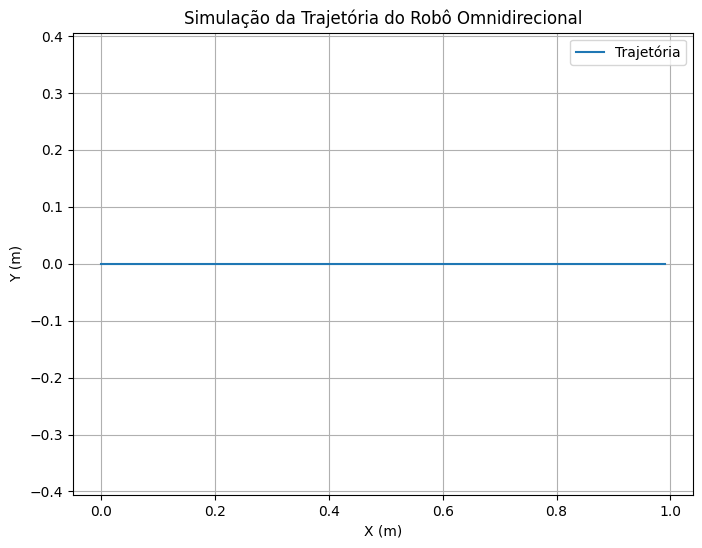

In [29]:
v_robo_desejada = np.array([0.1,0,0]) # [x_dot, y_dot, theta_dot]
trajetoria = simular_trajetoria(v_robo_desejada)

plt.figure(figsize=(8,6))
plt.plot(trajetoria[:,0], trajetoria[:,1], label="Trajetória")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Simulação da Trajetória do Robô Omnidirecional")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()